In [0]:
#Authors : Bhargav Muktevi,Chaitanya Upadrasta,Sharanya Hunasamranahalli Thotadarya
import os
os.getcwd()

'/content'

In [0]:
from google.colab import drive
drive.mount('/content/drive/')
%cd 'drive/My Drive/Colab Notebooks'


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/
/content/drive/My Drive/Colab Notebooks


In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from datasets import MNISTDataset
import pandas as pd
import matplotlib.pyplot as plt

11493376/11490434 [==============================] - 0s 0us/step


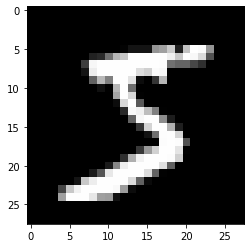

In [0]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

plt.imshow(train_images[0], cmap="Greys_r")

data = MNISTDataset(train_images.reshape([-1, 784]), train_labels, 
                    test_images.reshape([-1, 784]), test_labels,
                    batch_size=128)

In [0]:
train_steps = 1000
learning_rate = 0.1
W1 = tf.Variable(tf.random.uniform(shape=[784, 10], minval=-0.1, maxval=0.1))
W2 = tf.Variable(tf.random.uniform(shape=[10, 10], minval=-0.1, maxval=0.1))
b1 = tf.Variable(tf.random.uniform(shape=[10], minval=-0.1, maxval=0.1))
b2 = tf.Variable(tf.random.uniform(shape=[10], minval=-0.1, maxval=0.1))


In [0]:
learning = []
Accuracy = []

Loss: 2.2931506633758545 Accuracy: 0.0703125
Loss: 0.7456008791923523 Accuracy: 0.7890625
Loss: 0.5444620847702026 Accuracy: 0.875
Loss: 0.40512511134147644 Accuracy: 0.8828125
Loss: 0.4975578188896179 Accuracy: 0.890625
Starting new epoch...
Loss: 0.3652417063713074 Accuracy: 0.8984375
Loss: 0.3534565567970276 Accuracy: 0.8828125
Loss: 0.4238622784614563 Accuracy: 0.8984375
4
Loss: 0.281074583530426 Accuracy: 0.890625
Loss: 0.3031618595123291 Accuracy: 0.90625
Starting new epoch...


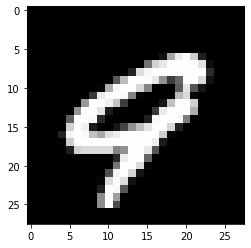

In [0]:
for step in range(train_steps):
    img_batch, lbl_batch = data.next_batch()
    with tf.GradientTape() as tape:
      #logits1 = tf.nn.relu(tf.matmul(img_batch, W1) + b1)
      logits1 = tf.matmul(img_batch, W1) + b1
      logits2 = tf.matmul(logits1, W2) + b2
      xent = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
            logits=logits2, labels=lbl_batch)) #cross entropy loss for the batch of images

    grads = tape.gradient(xent, [W1,b1,W2, b2])#gradient calculation using auto differentiation
    W1.assign_sub(learning_rate * grads[0])
    b1.assign_sub(learning_rate * grads[1])
    W2.assign_sub(learning_rate * grads[2])
    b2.assign_sub(learning_rate * grads[3])
    #W3.assign_sub(learning_rate * grads[4])
    #b3.assign_sub(learning_rate * grads[5])
    if not step % 100:
      #learning_rate=learning_rate/10 (decaying learning rate)
      preds = tf.argmax(logits2, axis=1, output_type=tf.int32)
      if step == 800:
        Output = [index for index, elem in enumerate(lbl_batch) if elem != preds[index]] 
        plt.imshow(img_batch[Output[1]].reshape([28,28]), cmap="Greys_r")
        print(preds[Output[1]].numpy())
        #plt.imshow(train_images[0], cmap="Greys_r")
        
      acc = tf.reduce_mean(tf.cast(tf.equal(preds, lbl_batch),
                             tf.float32)) #accuracy of training set
      learning.append(step)
      Accuracy.append(acc.numpy())
      print("Loss: {} Accuracy: {}".format(xent, acc))


 Misclassified example after 800 training steps.Prediction was checked at 800th step under the assumption that the model would have learn't parameters well.

In [0]:
 #test accuracy    
 #l1=tf.nn.relu(tf.matmul(data.test_data, W1) + b1)
 l1=(tf.matmul(data.test_data, W1) + b1)

 l2=tf.nn.softmax(tf.matmul(l1, W2) + b2)

#l3=tf.matmul(l2, W3) + b3
test_preds = tf.argmax(l2, axis=1, output_type=tf.int32)
test_acc = tf.reduce_mean(tf.cast(tf.equal(test_preds, data.test_labels),
                             tf.float32))*100   #test accuracy                       
test_acc

<tf.Tensor: shape=(), dtype=float32, numpy=91.299995>

**OBSERVATIONS**

**Different Variables that affect the output:**

1) **weights,biases:**

Cannot initialize weights to zero as the error propogated through all the neurons will be zero .This will lead to slow learning.This issue also happens when all the weights are equal


---


2) **layers:**
As the number of layers are increased,the model tends to overfit.

---


3) **activations:**
Linear activation for hidden layer outperforms(although not very significantly) Relu and sigmoid.
Softmax was used as it's a multicalss classification problem

---



4) **learning rate:**
The model performs poorly when the learning rate is increased.Another strange thing that was observed is that as the learning rate is decayed by a factor of 10 for every 100 training steps ,the accuracy of the model decreases.The expectation was that the model would perform better with a lower learning rate when it's closer to the global minimum.However,the interdependecies between various variables (like training size,batch size,layers) was not considered.



---



5) **Training steps:**
Accuracy improves as the no of training steps are increased but after a certain numbe 